In [1]:
import numpy as np
import matplotlib.pyplot as plt
import acceleration_analysis as sp


freq_WebDAQ = 1651

def analyse_wdfile(wdf, dt = 1/freq_WebDAQ, data_len = None, range = None):

    if data_len is None:
        data = sp.openfile(wdf)
    else:
        data = sp.openfile(wdf,data_len)

    if range is not None:
        data = data[:,range[0]:range[1]]

    spe = np.fft.rfft(data, norm="ortho", axis=-1)
    nn = np.sqrt(spe.shape[-1])
    pow = (np.abs(spe)) / nn
    phase = np.angle(spe)
    freq = np.fft.rfftfreq(data.shape[-1], d=dt)
    pow[:,0] = 0

    return pow, freq, phase

    

(9000.0, 51500.0)

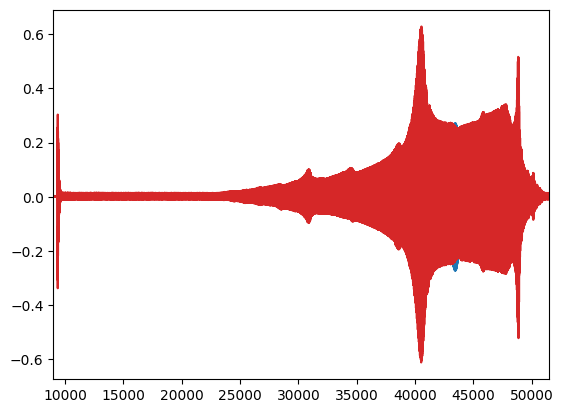

In [ ]:
wdfile = 'OBB-Vibration-piezoTest_20250424_095700.wdd'
N = 60000
data = sp.openfile(wdfile,data_len=N)

t_vec = np.arange(N)

plt.figure()
plt.plot(t_vec,data.T)
plt.xlim([9000, 51500])
plt.grid(True)

0.1036091167673845
3.0951131862902495
3.1590016446421774
0.0


Text(0.5, 1.0, 'OBB-Vibration-piezoTest_20250424_095700.wdd')

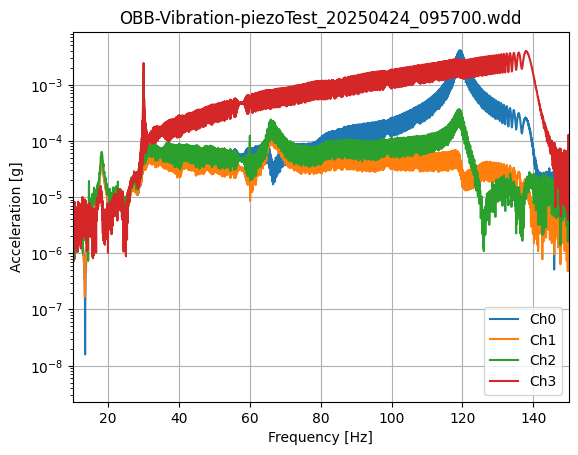

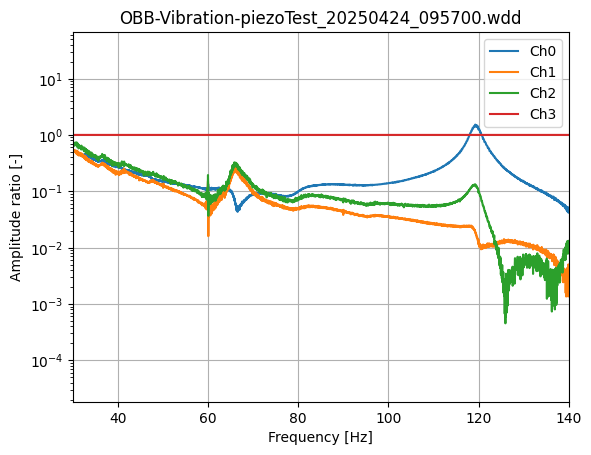

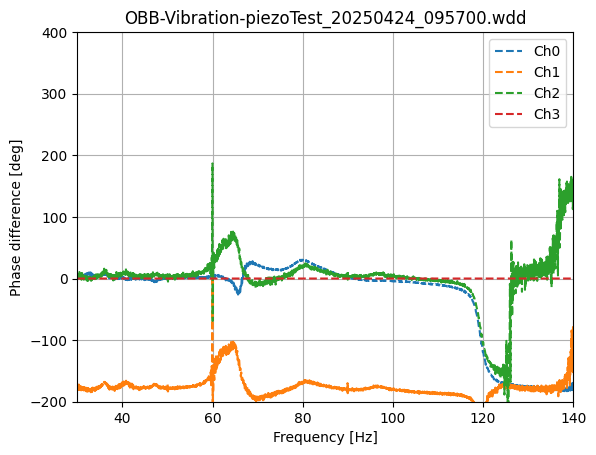

In [ ]:
data_range = np.array([9000,51000])
spe, freq, phase = analyse_wdfile(wdfile,data_len=60000,range=data_range)

plt.figure()
for k in range(np.shape(spe)[0]):
    plt.plot(freq,spe[k], label=f'Ch{k}')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Acceleration [g]')
plt.grid(True)
plt.xlim([10, 150])
plt.yscale('log')
plt.title(wdfile)


plt.figure()
for k in range(np.shape(spe)[0]):
    amp = spe[k] / np.maximum(1e-12,spe[-1])
    plt.plot(freq,amp, label=f'Ch{k}')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude ratio [-]')
plt.grid(True)
plt.xlim([30, 140])
plt.yscale('log')
plt.title(wdfile)

plt.figure()
for k in range(np.shape(spe)[0]):
    dphi = phase[k] - phase[-1]
    dphi = np.unwrap(dphi,period=np.pi)
    id = np.argmin(np.abs(freq-30))
    #dph = (dphi[id] + np.pi) % (2*np.pi) - np.pi
    #print(dph*180/np.pi)
    dphi -= np.round(dphi[id] / (2*np.pi)) * 2*np.pi
    ids = np.arange(len(freq))
    ids80100 = ids[(freq>80) * (freq<100)]
    ids4060 = ids[(freq>40) * (freq<60)]
    delta = np.mean(dphi[ids80100]) - np.mean(dphi[ids4060])
    #print(delta)
    dphi[ids[freq>60]] -= np.round(delta / (np.pi)) * np.pi
    plt.plot(freq,dphi*180/np.pi, '--', label=f'Ch{k}')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase difference [deg]')
#plt.xscale('log')
plt.grid(True)
plt.xlim([30, 140])
plt.ylim([-250, 250])
plt.title(wdfile)


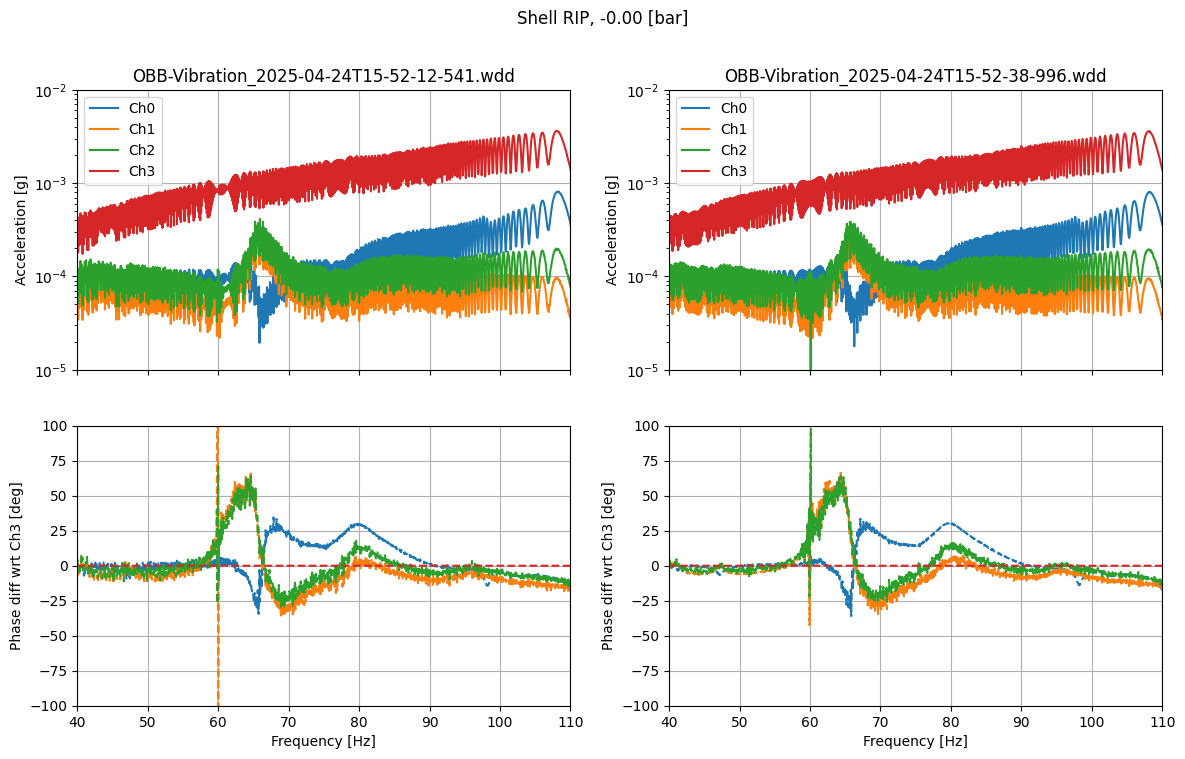

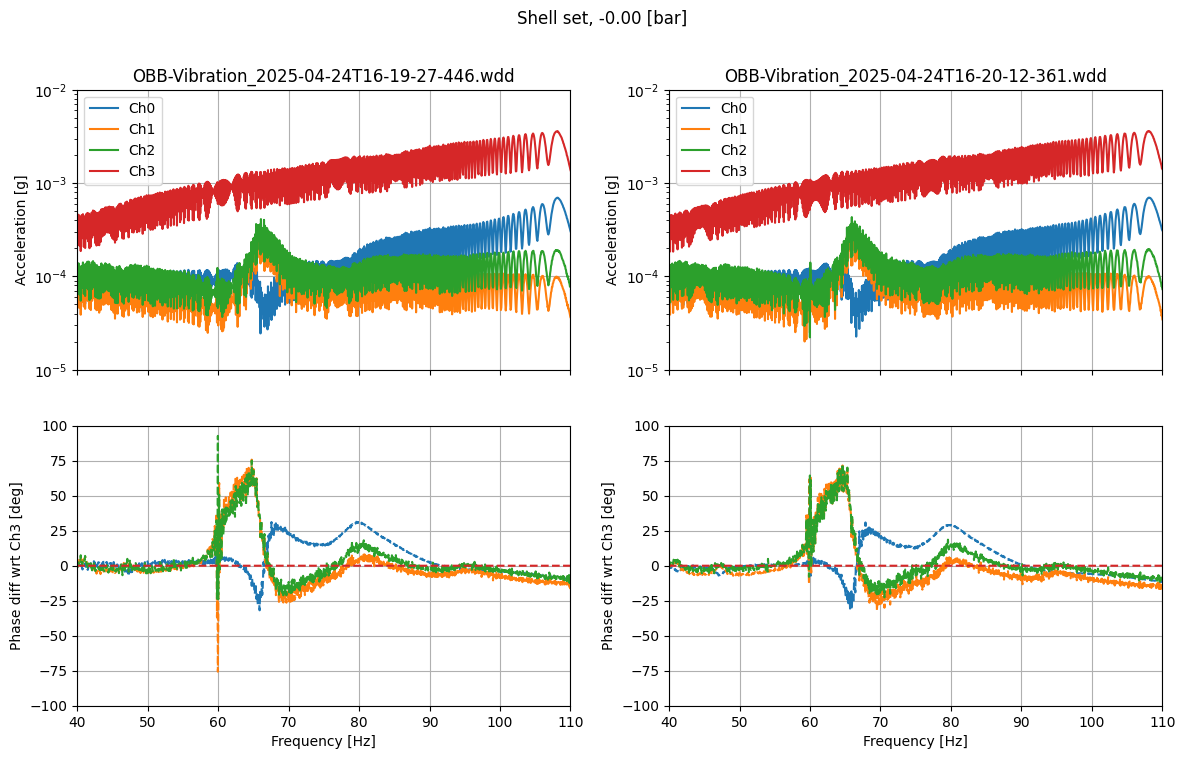

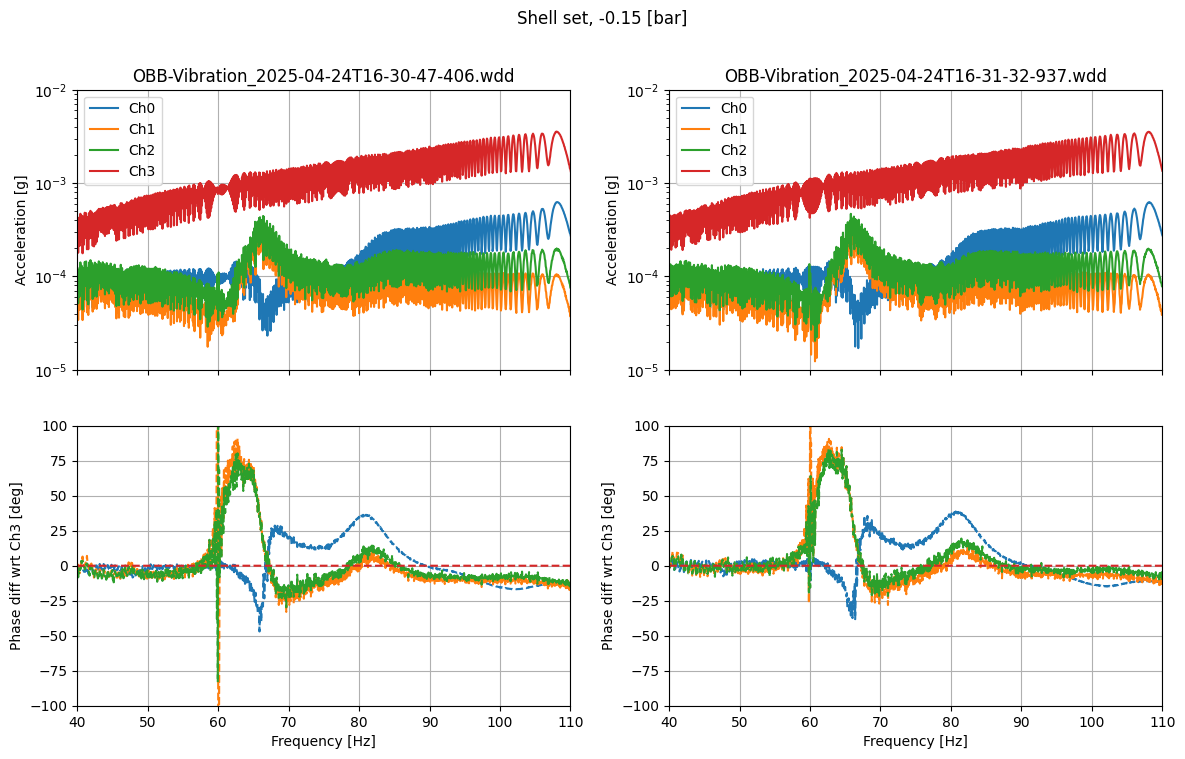

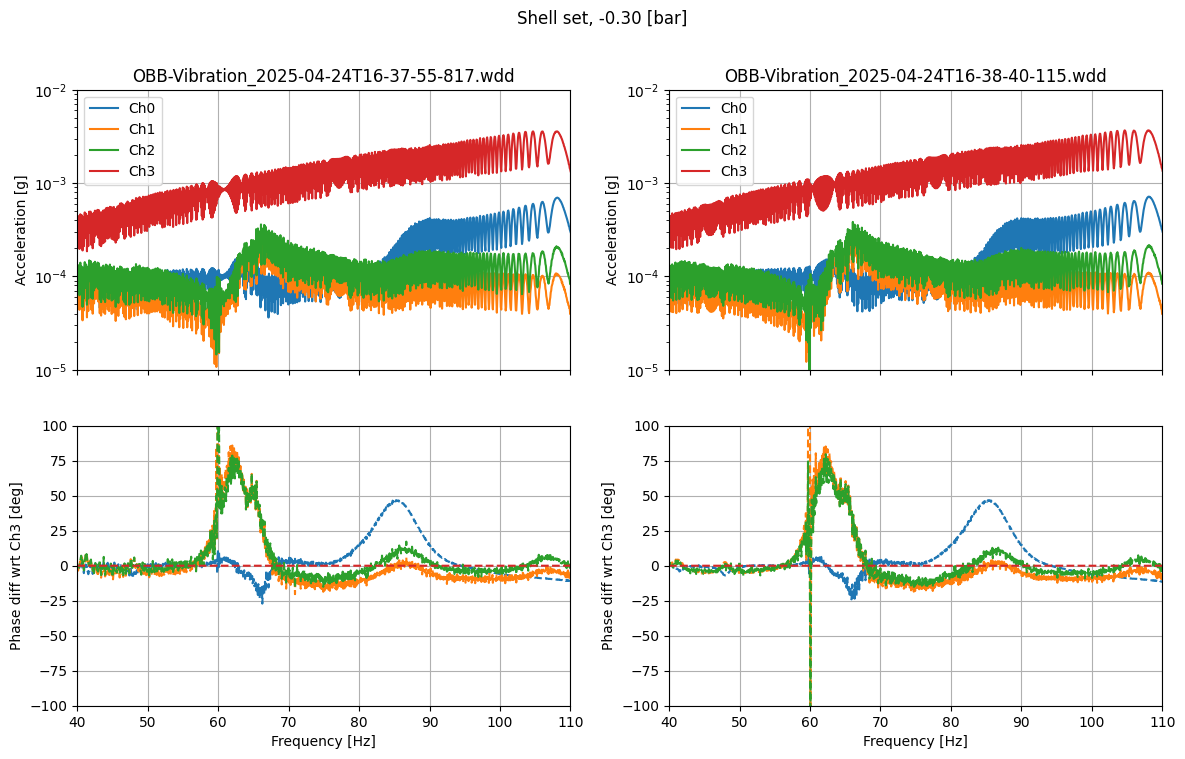

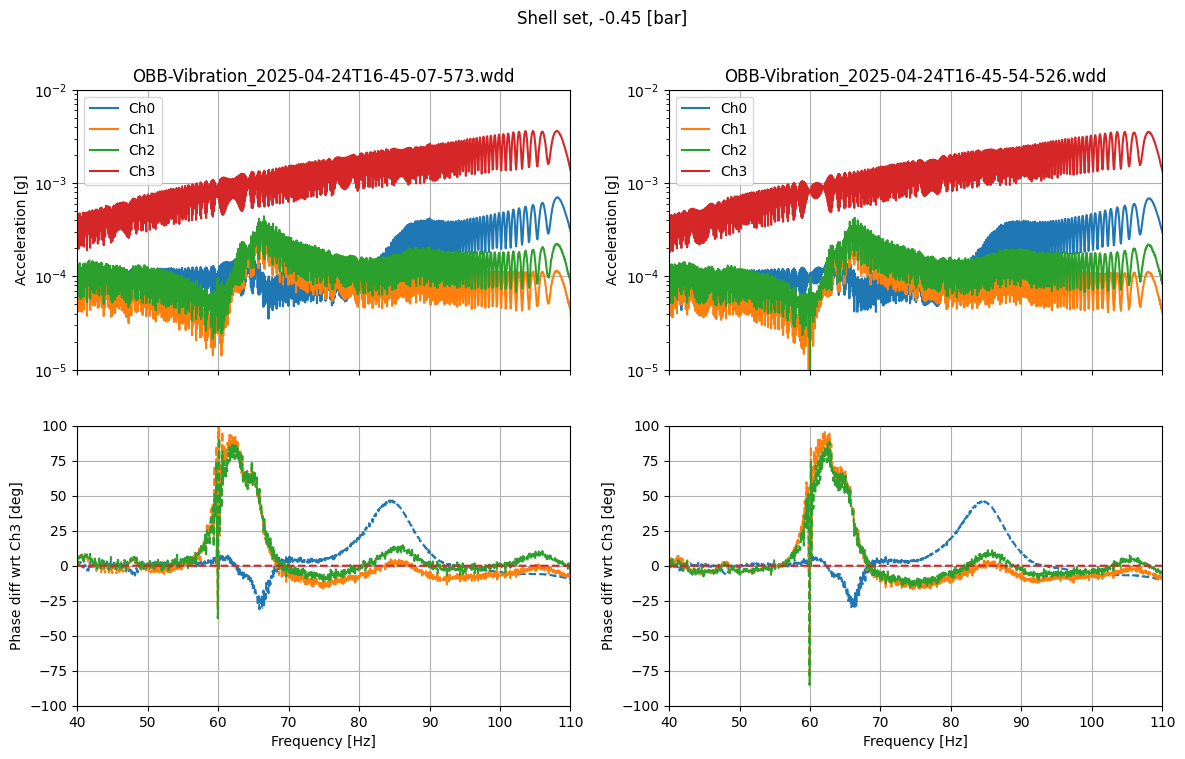

In [83]:
def analyse_wdflist(wdflist, titles, f_sweep = np.array([40,110])):

    for k,wdf in enumerate(wdflist):
        spe, freq, phase = analyse_wdfile(wdf)

        jj = k % 2
        if jj == 0:
            fig, axes = plt.subplots(2,2, sharex=True, figsize=(14,8))
            fig.suptitle(titles[int(np.floor(k/2))])

        sub1 = axes[0,jj]
        sub2 = axes[1,jj]

        for k in range(np.shape(spe)[0]):
            sub1.plot(freq,spe[k], label=f'Ch{k}')
        sub1.set_title(wdf)
        sub1.legend()
        sub1.set_ylabel('Acceleration [g]')
        sub1.grid(True)
        sub1.set_xlim([f_sweep[0], f_sweep[1]])
        sub1.set_ylim([1e-5,1e-2])
        sub1.set_yscale('log')

        for k in range(np.shape(spe)[0]):
            dphi = phase[k] - phase[-1]
            dphi = np.unwrap(dphi,period=np.pi)
            id = np.argmin(np.abs(freq-f_sweep[0]))
            dphi -= dphi[id] #np.round(dphi[id] / (2*np.pi)) * 2*np.pi
            ids = np.arange(len(freq))
            ids80100 = ids[(freq>80) * (freq<100)]
            ids4060 = ids[(freq>40) * (freq<60)]
            delta = np.mean(dphi[ids80100]) - np.mean(dphi[ids4060])
            dphi[ids[freq>60]] -= np.round(delta / (np.pi)) * np.pi
            sub2.plot(freq,dphi*180/np.pi, '--', label=f'Ch{k}')
        sub2.set_xlabel('Frequency [Hz]')
        sub2.set_ylabel('Phase diff wrt Ch3 [deg]')
        sub2.grid(True)
        sub2.set_ylim([-100, 100])


wdflist = ['OBB-Vibration_2025-04-24T15-52-12-541.wdd',
        'OBB-Vibration_2025-04-24T15-52-38-996.wdd',
        'OBB-Vibration_2025-04-24T16-19-27-446.wdd',
        'OBB-Vibration_2025-04-24T16-20-12-361.wdd',
        'OBB-Vibration_2025-04-24T16-30-47-406.wdd',
        'OBB-Vibration_2025-04-24T16-31-32-937.wdd',
        'OBB-Vibration_2025-04-24T16-37-55-817.wdd',
        'OBB-Vibration_2025-04-24T16-38-40-115.wdd',
        'OBB-Vibration_2025-04-24T16-45-07-573.wdd',
        'OBB-Vibration_2025-04-24T16-45-54-526.wdd']

analyse_wdflist(wdflist, titles = ['Shell RIP, -0.00 [bar]', 'Shell set, -0.00 [bar]', 'Shell set, -0.15 [bar]', 'Shell set, -0.30 [bar]', 'Shell set, -0.45 [bar]'])